# [phitar](https://jangcom.github.io/phitar/): Testing of the e-type = 22 source subsection

by J. Jang

* Last: 2020-06-06
* First: 2020-04-30

## Introduction

Options for setting source energy distributions will be added to phitar v1.04. One of the options is a free-format energy distribution setter that uses the e-type = 22 subsection of PHITS. Before beginning the update, here we examine if the e-type = 22 subsection leads to equivalent results of the e-type = 2 subsection added also in phitar v1.04. Whether the e-type = 22 can be used as the e-type = 8 (discrete energy distribution) is also tested.

In [1]:
import re
import subprocess
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from IPython.display import set_matplotlib_formats
from IPython.display import SVG

In [2]:
# I/O
out_path = './out'  # Outbound
phitar_fig_path = '../../../figs'  # Inbound
phits_path = '../phits'
expt_path = '../expt'
etype2_path = '../../etype2'
etype2_phits_path = '{}/phits'.format(etype2_path)

# pandas
flue_header = ['Energy (MeV)', 'Monte Carlo fluence (cm$^{-2}$ source$^{-1}$)']

# MPL
mpl.rcParams.update({'font.sans-serif': 'Arial',
                     'pdf.fonttype': 42})
plt.style.use('bmh')
xlabpad = 15
ylabpad = 15

# IPython.display
set_matplotlib_formats('svg')

In [3]:
def disp_rows_of_int(lines, rows, rows_of_int):
    """Display the rows of interest of a PHITS input file."""
    for i in range(len(lines)):
        for row in rows_of_int:
            if i in rows[row]['range']:
                if i == rows[row]['range'][0]:
                    print(rows[row]['header'])
                print(lines[i])

In [4]:
def save_curr_fig(out_bname, out_path=out_path):
    """Save a figure in multiple formats."""
    out_bname_full = '{}/{}'.format(out_path, out_bname)
    for fmt in ['pdf', 'svg']:
        plt.savefig('{}.{}'.format(out_bname_full, fmt), bbox_inches='tight')
    rtn = subprocess.run('inkscape {}.svg -M {}.emf'.format(out_bname_full, out_bname_full))

In [5]:
def plot_flue(ax, xdata, ydata,
              xmin=30, xmax=40,
              xlab=flue_header[0], ylab=flue_header[1],
              clr='r', mrk='o', ls='None', lab='e0', loc=0):
    """Plot particle fluence against energy."""
    ax.set_xlim(xmin, xmax)
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.tick_params(axis='both', which='major', direction='in', length=5)
    ax.tick_params(axis='both', which='minor', direction='in', length=3)
    ax.set_xlabel(xlab, labelpad=xlabpad)
    ax.set_ylabel(ylab, labelpad=ylabpad)
    ax.plot(xdata, ydata, color=clr, marker=mrk, linestyle=ls, label=lab)
    ax.legend(loc=loc)

## Comparison using T-Cross tallies

### Geometry and tally settings

Retrieve the descriptive figure obtained in the previous report 'etype2.html'.

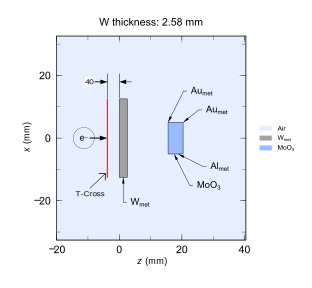

In [6]:
SVG(filename='{}/etype2.svg'.format(phitar_fig_path))

* Electron beams begin propagation at z = -50 mm toward the +z direction with an incidence angle of 0 deg.
* The energy spectra of "intact" electron beams are measured by using a T-Cross tally placed at an "ambient" virtual plane at z = -40 mm.
* The T-Cross tally output is set to be "flux", but is equivalent to "current" because the incidence angle is 0 deg (p. 210, PHITS v3.02 JP man).

### Gaussian energy distribution

Retrieve the particle fluences of e-type = 2 from the previous report 'etype2.html'.

In [7]:
etype2_t_cross_trimmed = '{}/etype2-cross-eng-intact_trimmed.ang'.format(etype2_phits_path)
df2 = pd.read_csv(etype2_t_cross_trimmed, sep=r'\s+')
df2

,e-lower,e-upper,electron,r.err,photon,r.err.1
0,0.00,0.04,0.0,0.0,0.000000,0.0
1,0.04,0.08,0.0,0.0,0.000412,1.0
2,0.08,0.12,0.0,0.0,0.000000,0.0
3,0.12,0.16,0.0,0.0,0.000000,0.0
4,0.16,0.20,0.0,0.0,0.000424,1.0
...,...,...,...,...,...,...
995,39.80,39.84,0.0,0.0,0.000000,0.0
996,39.84,39.88,0.0,0.0,0.000000,0.0
997,39.88,39.92,0.0,0.0,0.000000,0.0
998,39.92,39.96,0.0,0.0,0.000000,0.0


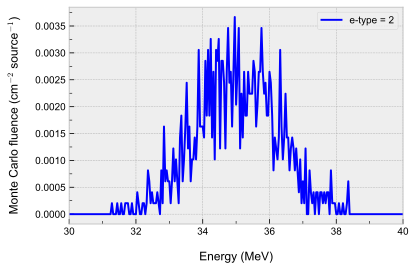

In [8]:
plot_flue(plt.subplot(), df2.loc[:, 'e-upper'], df2.loc[:, 'electron'],
          clr='b', mrk='None', ls='-', lab='e-type = 2')

The total electron fluence is

In [9]:
tot_elec_flue = df2.electron.sum()
print('{:.3f} cm^-2 source-^1'.format(tot_elec_flue))

0.202 cm^-2 source-^1


### Free-form energy distribution

Retrieve experimentally obtained energy spectra.

In [10]:
xlsx = '{}/expt2_beam_nrg_dist.xlsx'.format(expt_path)
df3 = pd.read_excel(xlsx, sheet_name='35MeV')
df3

,x-axes [pixel],8bit count,x-axes + W_ROI/2 [pixel],x-axes [MeV],Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,0,1.7056,-364.5,33.168348,NaN,NaN,NaN,NaN,NaN,NaN,file name,35MeV_20190605_1506_PRM3_DS0_EXP100 - コピー.tif,NaN
1,1,2.5944,-363.5,33.173373,NaN,NaN,NaN,NaN,NaN,補正回転角,ImageJ rotation,2.21,deg
2,2,3.1167,-362.5,33.178398,NaN,NaN,NaN,NaN,NaN,ROI,X_ROI,269,pixel
3,3,3.3722,-361.5,33.183423,NaN,NaN,NaN,NaN,NaN,NaN,Y_ROI,406,pixel
4,4,3.4056,-360.5,33.188448,NaN,NaN,NaN,NaN,NaN,NaN,W_ROI,729,pixel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,724,0.2500,359.5,36.806526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
725,725,0.1889,360.5,36.811552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
726,726,0.2333,361.5,36.816577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
727,727,0.2444,362.5,36.821602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create a normalized column.

In [11]:
df4 = df3.copy()

xcol = 'x-axes [MeV]'
ycol = '8bit count'
ycol_norm = '8bit count, normalized'
norm_wrto = df4.loc[:, ycol].sum()  # Sum of the original 8-bit counts
df4.loc[:, ycol_norm] = df3.loc[:, ycol] / norm_wrto

In [12]:
# e-type = 22
df4_etype22 = df4.loc[:, [xcol, xcol, ycol_norm]]
df4_etype22

,x-axes [MeV],x-axes [MeV],"8bit count, normalized"
0,33.168348,33.168348,0.000407
1,33.173373,33.173373,0.000619
2,33.178398,33.178398,0.000743
3,33.183423,33.183423,0.000804
4,33.188448,33.188448,0.000812
...,...,...,...
724,36.806526,36.806526,0.000060
725,36.811552,36.811552,0.000045
726,36.816577,36.816577,0.000056
727,36.821602,36.821602,0.000058


Check if the sum of the normalized 8-bit counts is 1.

In [13]:
print('Sum: {}'.format(df4_etype22[ycol_norm].sum()))

Sum: 1.0


Compare the original and normalized 8-bit counts.

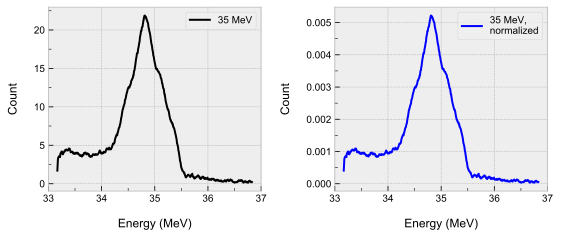

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3.5))
plot_flue(axs[0], df3.loc[:, xcol], df3.loc[:, ycol],
          xmin=33, xmax=37,
          ylab='Count', clr='k', mrk='None', ls='-', lab='35 MeV', loc=1)
plot_flue(axs[1], df4_etype22.iloc[:, 1], df4_etype22.iloc[:, 2],
          xmin=33, xmax=37,
          ylab='Count', clr='b', mrk='None', ls='-', lab='35 MeV,\nnormalized', loc=1)
fig.tight_layout(pad=1.5)
save_curr_fig('orig_and_norm_8bit_cnts')

Note that the two subplots have different y-ranges.

Add the normalized energy distribution data to a PHITS input file.

Part of a PHITS input file 'etype22.inp'

In [15]:
# e-type = 22
nrg35_dist_etype22_f = '{}/nrg35_dist_etype22.txt'.format(phits_path)
df4_etype22.to_csv(nrg35_dist_etype22_f, sep=' ', header=False, index=False)

In [16]:
f = '{}/etype22.inp'.format(phits_path)
fh = open(f)
for v in (fh.readlines())[47:57]:
    print(v, end='')
print('...')

[Source]
s-type =        3 $ Gaussian distribution in xyz dirs
proj   = electron $ Projectile
$e0     =       c1 $ Monoenergetic
e-type =       22 $ Free-form energy distribution
ne     =      729
    33.168348045397224 33.168348045397224 0.00040684917805660297
    33.173373153640306 33.173373153640306 0.0006188611090232474
    33.17839826188339 33.17839826188339 0.0007434491283120395
    33.18342337012647 33.18342337012647 0.0008043954023466678
...


Run the PHITS input with icntl = 0.

In [17]:
!phits ../phits/etype22.inp

Started at  2020/06/06 13:59:12.39, input= "etype22.inp" 
OpenMP PARALLEL PROCESS   1/   4  @ IP(MPI)=    0
OpenMP PARALLEL PROCESS   4/   4  @ IP(MPI)=    0
OpenMP PARALLEL PROCESS   2/   4  @ IP(MPI)=    0
OpenMP PARALLEL PROCESS   3/   4  @ IP(MPI)=    0
bat[       1] ncas =           1000. : date = 2020-06-06 : time = 13h 59m 28
OpenMP FINALIZE   4/   4  @ IP(MPI)=    0
OpenMP FINALIZE   2/   4  @ IP(MPI)=    0
OpenMP FINALIZE   3/   4  @ IP(MPI)=    0
OpenMP FINALIZE   1/   4  @ IP(MPI)=    0

 ANGEL         Graphic Program Version  4.50
 Copyright (C) Koji NIITA  1993-2005. All rights reserved.

Finished at 2020/06/06 13:59:30.88


Check the T-Cross result.

In [18]:
t_cross_bname_full = '{}/etype22-cross-eng-intact'.format(phits_path)
t_cross = '{}.ang'.format(t_cross_bname_full)
t_cross_trimmed = '{}_trimmed.ang'.format(t_cross_bname_full)

In [19]:
# Read in the T-Cross result file.
t_cross_fh = open(t_cross)
t_cross_lines = [v for v in t_cross_fh]
t_cross_fh.close()

In [20]:
# Retrieve only the data part and write them to a file.
data_rows = range(251, 1252)
t_cross_data = [t_cross_lines[v] for v in data_rows]
t_cross_data[0] = re.sub('#(.*)', ' \\1', t_cross_data[0])
t_cross_trimmed_fh = open(t_cross_trimmed, 'w')
for line in t_cross_data:
    t_cross_trimmed_fh.write(line)
t_cross_trimmed_fh.close()

In [21]:
df5 = pd.read_csv(t_cross_trimmed, sep=r'\s+')
df5

,e-lower,e-upper,electron,r.err,photon,r.err.1
0,0.00,0.04,0.0,0.0,0.000000,0.0
1,0.04,0.08,0.0,0.0,0.000424,1.0
2,0.08,0.12,0.0,0.0,0.000205,1.0
3,0.12,0.16,0.0,0.0,0.000422,1.0
4,0.16,0.20,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...
995,39.80,39.84,0.0,0.0,0.000000,0.0
996,39.84,39.88,0.0,0.0,0.000000,0.0
997,39.88,39.92,0.0,0.0,0.000000,0.0
998,39.92,39.96,0.0,0.0,0.000000,0.0


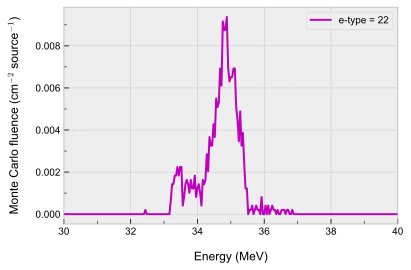

In [22]:
plot_flue(plt.subplot(), df5.loc[:, 'e-upper'], df5.loc[:, 'electron'],
          clr='m', mrk='None', ls='-', lab='e-type = 22')
save_curr_fig('etype22')

The total electron fluence is

In [23]:
tot_elec_flue = df5.electron.sum()
print('{:.3f} cm^-2 source-^1'.format(tot_elec_flue))

0.203 cm^-2 source-^1


which is almost the same as the e-type = 2 one (see [Gaussian energy distribution](#Gaussian-energy-distribution)).

### Additional test: Use of e-type = 22 as e-type = 8

e-type = 8 is a source subsection used to set discrete energy distribution. The main difference between e-type = 22 and e-type = 8 is the energy bin expression:

* e-type = 8: energy point, weight
* e-type = 22: e-lower, e-upper, weight

Therefore, an energy bin of the e-type = 8 subsection having the same value of e-lower and e-upper is effectively an energy point of the e-type = 8 subsection (p. 93, PHITS v3.02 JP man). For this reason, the author decided to add the more versatile e-type = 22 subsection to phitar v1.04. Here we test if the e-type = 22 can really be used as the e-type = 8.

Create an e-type = 8 dataframe.

In [24]:
# e-type = 8
df4_etype8 = df4.loc[:, [xcol, ycol_norm]]
df4_etype8

,x-axes [MeV],"8bit count, normalized"
0,33.168348,0.000407
1,33.173373,0.000619
2,33.178398,0.000743
3,33.183423,0.000804
4,33.188448,0.000812
...,...,...
724,36.806526,0.000060
725,36.811552,0.000045
726,36.816577,0.000056
727,36.821602,0.000058


Add the energy distribution data to a PHITS input file having e-type = 8.

Part of a PHITS input file 'etype8.inp'

In [25]:
# e-type = 8
nrg35_dist_etype8_f = '{}/nrg35_dist_etype8.txt'.format(phits_path)
df4_etype8.to_csv(nrg35_dist_etype8_f, sep=' ', header=False, index=False)

In [26]:
f = '{}/etype8.inp'.format(phits_path)
fh = open(f)
for v in (fh.readlines())[47:57]:
    print(v, end='')
print('...')

[Source]
s-type =        3 $ Gaussian distribution in xyz dirs
proj   = electron $ Projectile
$e0     =       c1 $ Monoenergetic
e-type =        8 $ Discrete energy distribution
ne     =      729
    33.168348045397224 0.00040684917805660297
    33.173373153640306 0.0006188611090232474
    33.17839826188339 0.0007434491283120395
    33.18342337012647 0.0008043954023466678
...


In [27]:
!phits ../phits/etype8.inp

Started at  2020/06/06 13:59:36.50, input= "etype8.inp" 
OpenMP PARALLEL PROCESS   1/   4  @ IP(MPI)=    0
OpenMP PARALLEL PROCESS   3/   4  @ IP(MPI)=    0
OpenMP PARALLEL PROCESS   4/   4  @ IP(MPI)=    0
OpenMP PARALLEL PROCESS   2/   4  @ IP(MPI)=    0
bat[       1] ncas =           1000. : date = 2020-06-06 : time = 13h 59m 52
OpenMP FINALIZE   1/   4  @ IP(MPI)=    0
OpenMP FINALIZE   2/   4  @ IP(MPI)=    0
OpenMP FINALIZE   3/   4  @ IP(MPI)=    0
OpenMP FINALIZE   4/   4  @ IP(MPI)=    0

 ANGEL         Graphic Program Version  4.50
 Copyright (C) Koji NIITA  1993-2005. All rights reserved.

Finished at 2020/06/06 13:59:55.21


Check the T-Cross result.

In [28]:
t_cross_bname_full = '{}/etype8-cross-eng-intact'.format(phits_path)
t_cross = '{}.ang'.format(t_cross_bname_full)
t_cross_trimmed = '{}_trimmed.ang'.format(t_cross_bname_full)

In [29]:
# Read in the T-Cross result file.
t_cross_fh = open(t_cross)
t_cross_lines = [v for v in t_cross_fh]
t_cross_fh.close()

In [30]:
# Retrieve only the data part and write them to a file.
data_rows = range(251, 1252)
t_cross_data = [t_cross_lines[v] for v in data_rows]
t_cross_data[0] = re.sub('#(.*)', ' \\1', t_cross_data[0])
t_cross_trimmed_fh = open(t_cross_trimmed, 'w')
for line in t_cross_data:
    t_cross_trimmed_fh.write(line)
t_cross_trimmed_fh.close()

In [31]:
df6 = pd.read_csv(t_cross_trimmed, sep=r'\s+')
df6

,e-lower,e-upper,electron,r.err,photon,r.err.1
0,0.00,0.04,0.0,0.0,0.000000,0.0
1,0.04,0.08,0.0,0.0,0.000424,1.0
2,0.08,0.12,0.0,0.0,0.000205,1.0
3,0.12,0.16,0.0,0.0,0.000422,1.0
4,0.16,0.20,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...
995,39.80,39.84,0.0,0.0,0.000000,0.0
996,39.84,39.88,0.0,0.0,0.000000,0.0
997,39.88,39.92,0.0,0.0,0.000000,0.0
998,39.92,39.96,0.0,0.0,0.000000,0.0


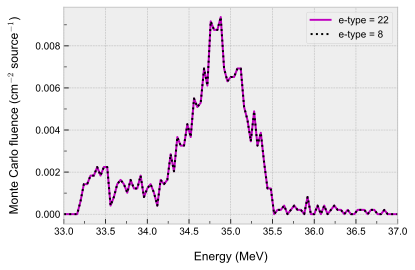

In [32]:
ax = plt.subplot()
plot_flue(ax, df5.loc[:, 'e-upper'], df5.loc[:, 'electron'],
          xmin=33, xmax=37,
          clr='m', mrk='None', ls='-', lab='e-type = 22')
plot_flue(ax, df6.loc[:, 'e-upper'], df6.loc[:, 'electron'],
          xmin=33, xmax=37,
          clr='k', mrk='None', ls=':', lab='e-type = 8')
save_curr_fig('etype22_as_etype8')

The total electron fluence is

In [33]:
tot_elec_flue = df5.electron.sum()
print('{:.3f} cm^-2 source-^1'.format(tot_elec_flue))

0.203 cm^-2 source-^1


which is exactly the same as the e-type = 22 one (see [Free-form energy distribution](#Free-form-energy-distribution)).

## Summary

* In this test, the e-type = 22 subsection was compared with the e-type = 2 and e-type = 8 subsections.
* The obtained electron fluences were found to be all equivalent.
* By assigning the same value to the e-lower and e-upper of an energy bin, the e-type = 22 subsection can be used as the e-type = 8 subsection.